[[ 1.65801154  0.62748117]
 [ 0.51044173  1.17730732]
 [-2.0467784  -0.98998933]
 ...
 [ 0.19976811  0.25863836]
 [ 0.51063109  1.4257261 ]
 [ 1.54542775 -1.21311764]]


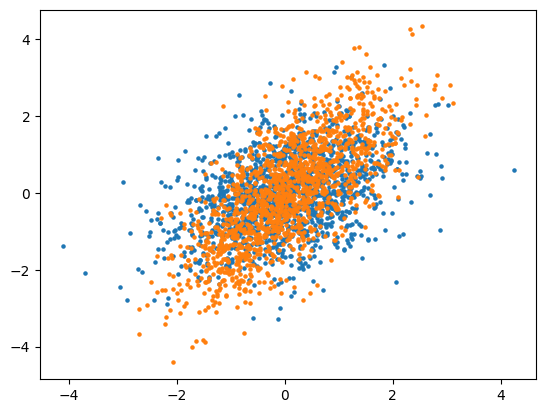

In [ ]:
from exp_f import gen_bvn, gen_multiregime_diagonal, gen_nonlinear_x2
import matplotlib.pyplot as plt

x = gen_bvn(n=1500, rho=0.4)
print(x)
plt.scatter(x = x[:,0], y = x[:,1], s=5)

y = gen_multiregime_diagonal(n=1500, K=1, noise=0.95)
plt.scatter(x=y[:,0], y = y[:,1], s=5)

   rho_abs_target  rho_abs_sample_mean  beta0_mean  beta0_std  beta0_min  \
0            0.00             0.019859        1.95   1.050063          1   
1            0.02             0.029030        1.95   1.099043          1   
2            0.04             0.034328        2.00   1.123903          1   
3            0.06             0.048908        1.95   1.099043          1   
4            0.08             0.071471        2.20   0.951453          1   

   beta0_max  beta0_mode  beta1_mean  beta1_std  beta1_min  beta1_max  V_mean  \
0          4           1         0.0        0.0          0          0    9.65   
1          5           1         0.0        0.0          0          0   10.35   
2          5           1         0.0        0.0          0          0   10.15   
3          4           1         0.0        0.0          0          0   10.15   
4          4           3         0.0        0.0          0          0   10.25   

   E_mean  
0    7.70  
1    8.40  
2    8.15  
3    8.2

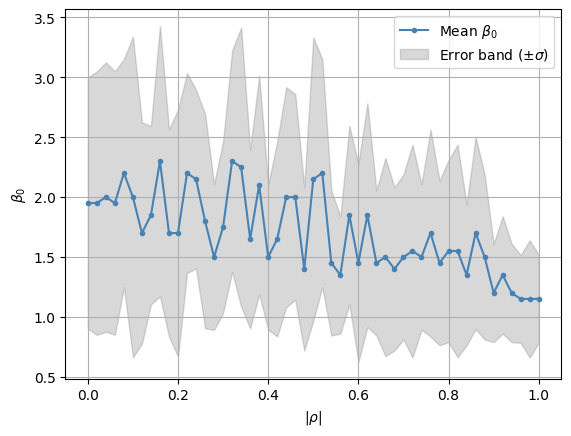

In [4]:
from exp_f import *
import random
# Sweep settings
rhos_abs = [round(v, 2) for v in np.arange(0, 1.001, 0.02)]
n = 1500
R = 20

# Mapper hyperparameters (start here, then tune)
mapper_params = dict(
    n_cubes=5,
    perc_overlap=0.3,
    dbscan_eps=0.3,
    dbscan_min_samples=5,
    normalize_z=True,
)

summary, raw = run_sweep(
    rhos_abs=rhos_abs,
    n=n,
    R=R,
    seed=random.randint(1,10000),
    use_negative=False,
    **mapper_params
)

    
print(summary.head())
#plot_betti_vs_rho(summary, title_suffix=" (Bivariate Normal)")

plot_betti_vs_rho_minmax(summary)
# Controls
#ctrl_x2 = run_control_nonlinear_x2(n=n, R=R, sigma=0.05, seed=999, **mapper_params)
#print("\nControl: y=x^2 + noise")
#print(ctrl_x2[["rho_abs_sample", "beta0", "beta1"]].describe())

#ctrl_mix = run_control_multiregime(n=n, R=R, K=4, noise=0.05, spacing=8.0, seed=2026, **mapper_params)
#print("\nControl: multi-regime diagonal clusters")
#print(ctrl_mix[["rho_abs_sample", "beta0", "beta1"]].describe())

